# Logistic Regression in Python With `scikit-learn`

This is the most straightforward kind of classification problem. There are several general steps you’ll take when you’re preparing your classification models:

1. **Import packages**, functions, and classes
2. **Get data** to work with and, if appropriate, transform it
3. **Create a classification model** and train (or fit) it with your existing data
4. **Evaluate your model** to see if its performance is satisfactory

A sufficiently good model that you define can be used to make further predictions related to new, unseen data. The above procedure is the same for classification and regression.


## Step 1: Import Packages, Functions, and Classes

First, you have to import `Matplotlib` for visualization and `NumPy` for array operations. You’ll also need `LogisticRegression`, `classification_report()`, and `confusion_matrix()` from `scikit-learn`:



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Get Data

In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input ($𝑥$) and output ($𝑦$) values:

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

The input and output should be `NumPy` arrays (instances of the class `numpy.ndarray`) or similar objects. `numpy.arange()` creates an array of consecutive, equally-spaced values within a given range. 

The array $x$ is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make $x$ two-dimensional, you apply `.reshape()` with the arguments `-1` to get as many rows as needed and `1` to get one column. 

Thus $x$ will have two dimensions:

* One column for a single input
* Ten rows, each corresponding to one observation

And $y$ is one-dimensional with ten items. 

Again, each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

## Step 3: Create a Model and Train It

Once you have the input and output prepared, you can create and define your classification model. You’re going to represent it with an instance of the class `LogisticRegression`:


In [6]:
model = LogisticRegression(solver='liblinear', random_state=0)

The above statement creates an instance of `LogisticRegression` and binds its references to the variable model. `LogisticRegression` has several optional parameters that define the behavior of the model and approach:

* `penalty` is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

* `dual` is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

* `tol` is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

* `C` is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

* `fit_intercept` is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

* `intercept_scaling` is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

* `class_weight` is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

* `random_state` is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

* `solver` is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

* `max_iter` is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

* `multi_class` is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

* `verbose` is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

* `warm_start` is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

* `n_jobs` is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

* `l1_ratio` is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

You should carefully match the solver and regularization method for several reasons:

* `liblinear` solver doesn’t work without regularization.
* 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
* 'saga' is the only solver that supports elastic-net regularization.

Once the model is created, you need to fit (or train) it. Model fitting is the process of determining the coefficients $𝑏_0, 𝑏_1, ..., 𝑏_r$ that correspond to the best value of the cost function. You fit the model with `.fit()`:



In [8]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

`.fit()` takes $x$, $y$, and possibly observation-related weights. Then it fits the model and returns the model instance itself:

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

This is the obtained string representation of the fitted model.

You can use the fact that `.fit()` returns the model instance and chain the last two statements. They are equivalent to the following line of code:



In [10]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

At this point, you have the classification model defined.

You can quickly get the attributes of your model.

For example, the attribute .`classes_ represents` the array of distinct values that $y$ takes:

In [11]:
model.classes_

array([0, 1])

This is the example of binary classification, and $y$ can be `0` or `1`, as indicated above.

You can also get the value of the slope $𝑏_1$ and the intercept $𝑏_0$ of the linear function $𝑓$ like so:


In [12]:
model.intercept_


array([-1.04608067])

In [13]:
model.coef_

array([[0.51491375]])

As you can see, $𝑏_0$ is given inside a one-dimensional array, while $𝑏_1$ is inside a two-dimensional array. 

You use the attributes `.intercept_` and `.coef_` to get these results.

## Step 4: Evaluate the Model

Once a model is defined, you can check its performance with `.predict_proba()`, which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [14]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is $1 - 𝑝(𝑥)$. The second column is the probability that the output is one, or $𝑝(𝑥)$.

You can get the actual predictions, based on the probability matrix and the values of $𝑝(𝑥)$, with `.predict()`:

In [15]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

This function returns the predicted output values as a one-dimensional array.

The figure below illustrates the input, output, and classification results:
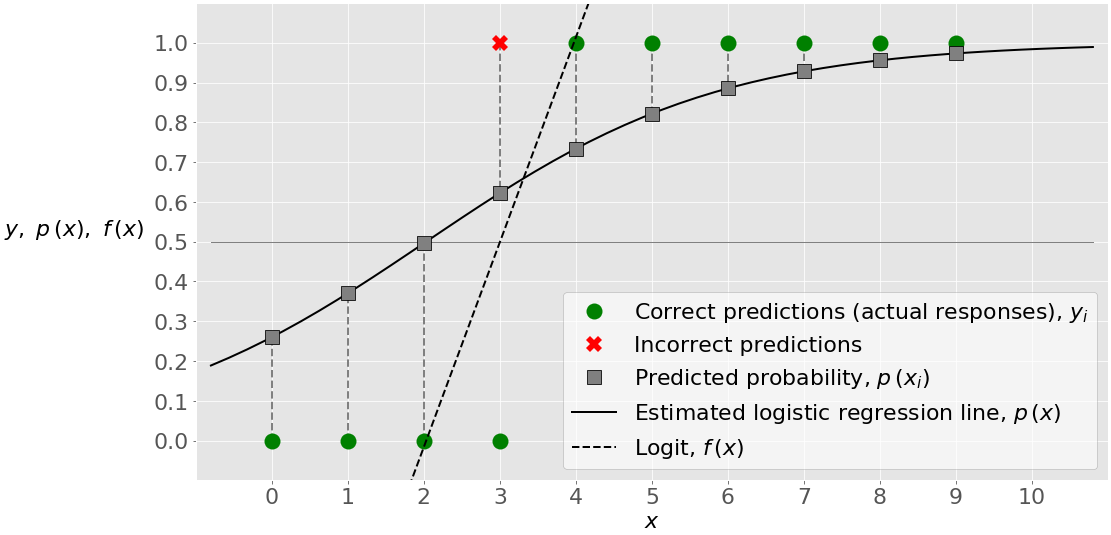

The *green circles* represent the actual responses as well as the correct predictions. The red `×` shows the incorrect prediction. The full black line is the estimated logistic regression line $𝑝(𝑥)$. The grey squares are the points on this line that correspond to $x$ and the values in the second column of the probability matrix. The black dashed line is the logit $𝑓(𝑥)$.

The value of $𝑥$ slightly above 2 corresponds to the threshold $𝑝(𝑥)=0.5$, which is $𝑓(𝑥)=0$. This value of $𝑥$ is the boundary between the points that are classified as zeros and those predicted as ones.

For example, the first point has input $𝑥=0$, actual output $𝑦=0$, probability $𝑝=0.26$, and a predicted value of $0$. The second point has $𝑥=1$, $𝑦=0$, $𝑝=0.37$, and a prediction of $0$. Only the fourth point has the actual output $𝑦=0$ and the probability higher than $0.5$ (at $𝑝=0.62$), so it’s wrongly classified as 1. All other values are predicted correctly.

When you have nine out of ten observations classified correctly, the accuracy of your model is equal to $9/10=0.9$, which you can obtain with `.score()`:

In [16]:
model.score(x, y)

0.9

`.score()` takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:

I. **True negatives** in the upper-left position

II. **False negatives** in the lower-left position

III. **False positives** in the upper-right position

IV. **True positives** in the lower-right position

To create the confusion matrix, you can use `confusion_matrix()` and provide the actual and predicted outputs as the arguments:

In [17]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

The obtained matrix shows the following:

a. Three true negative predictions: The first three observations are zeros predicted correctly.

b. No false negative predictions: These are the ones wrongly predicted as zeros.

c. One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.

d. Six true positive predictions: The last six observations are ones predicted correctly.

It’s often useful to visualize the confusion matrix. You can do that with `.imshow()` from `Matplotlib`, which accepts the confusion matrix as the argument:

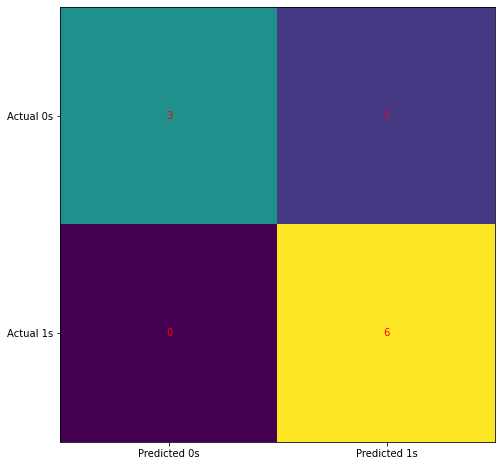

In [18]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In this figure, different colors represent different numbers and similar colors represent similar numbers. Heatmaps are a nice and convenient way to represent a matrix. To learn more about them, check out the Matplotlib documentation on Creating Annotated Heatmaps and `.imshow()`.

You can get a more comprehensive report on the classification with `classification_report()`:

In [19]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



This function also takes the actual and predicted outputs as arguments. It returns a report on the classification as a dictionary if you provide `output_dict=True` or a string otherwise.

## Step 5. Model improvement

You can improve your model by setting different parameters. For example, let’s work with the regularization strength `C` equal to $10.0$, instead of the default value of $1.0$:

In [20]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Now you have another model with different parameters. It’s also going to have a different probability matrix and a different set of coefficients and predictions:

In [21]:
model.intercept_

array([-3.51335372])

In [22]:
model.coef_

array([[1.12066084]])

In [23]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [24]:
 model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

As we can see, the absolute values of the intercept $𝑏_0$ and the coefficient $𝑏_1$ are larger. This is the case because the larger value of `C` means weaker regularization, or weaker penalization related to high values of $𝑏_0$ and $𝑏_1$.

Different values of $𝑏_0$ and $𝑏_1$ imply a change of the logit $𝑓(𝑥)$, different values of the probabilities $𝑝(𝑥)$, a different shape of the regression line, and possibly changes in other predicted outputs and classification performance. 

The boundary value of $𝑥$ for which $𝑝(𝑥)=0.5$ and $𝑓(𝑥)=0$ is higher now. It’s above $3$. In this case, you obtain all true predictions, as shown by the accuracy, confusion matrix, and classification report:

In [25]:
model.score(x, y)

1.0

In [26]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [27]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



The score (or accuracy) of 1 and the zeros in the lower-left and upper-right fields of the confusion matrix indicate that the actual and predicted outputs are the same. That’s also shown with the figure below:

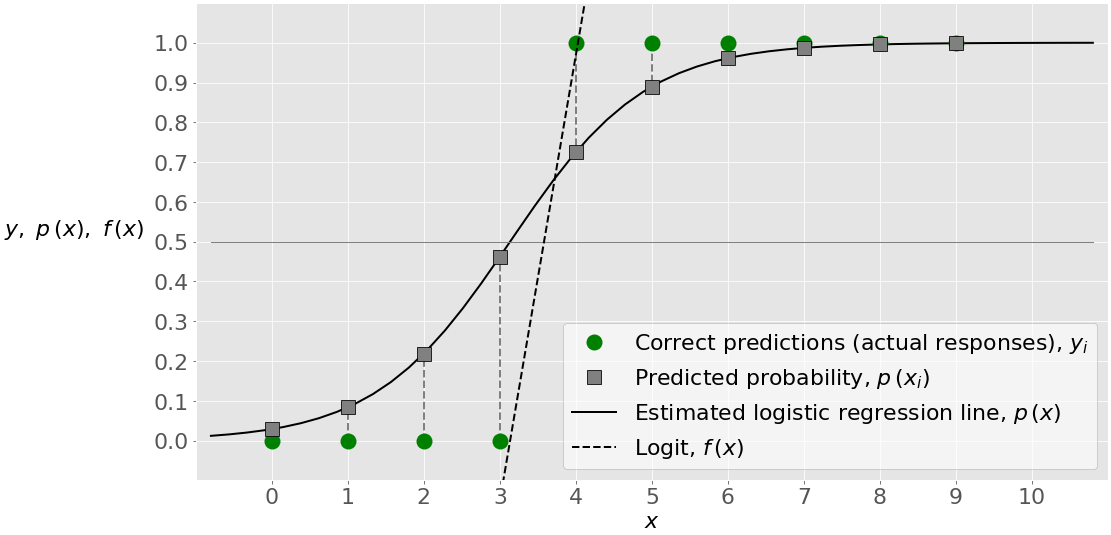

This figure illustrates that the estimated regression line now has a different shape and that the fourth point is correctly classified as 0. There isn’t a red $×$, so there is no wrong prediction.